In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [14]:
url = "https://docs.google.com/spreadsheets/d/1fsUVRLoyh9FlgMdBGQK3Sbo-3gviCRME/export?format=xlsx"

df = pd.read_excel(url)

df.head()


Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçevelik  
2       0.6929  Çerçevelik  
3       0.7624  Çerçevelik  
4       0.7557  Çerçevelik

In [15]:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
df.columns

Index(['area', 'perimeter', 'major_axis_length', 'minor_axis_length',
       'convex_area', 'equiv_diameter', 'eccentricity', 'solidity', 'extent',
       'roundness', 'aspect_ration', 'compactness', 'class'],
      dtype='str')

In [16]:
df.shape

(2500, 13)

In [17]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               2500 non-null   int64  
 1   perimeter          2500 non-null   float64
 2   major_axis_length  2500 non-null   float64
 3   minor_axis_length  2500 non-null   float64
 4   convex_area        2500 non-null   int64  
 5   equiv_diameter     2500 non-null   float64
 6   eccentricity       2500 non-null   float64
 7   solidity           2500 non-null   float64
 8   extent             2500 non-null   float64
 9   roundness          2500 non-null   float64
 10  aspect_ration      2500 non-null   float64
 11  compactness        2500 non-null   float64
 12  class              2500 non-null   str    
dtypes: float64(10), int64(2), str(1)
memory usage: 254.0 KB


In [18]:
df.isnull().sum()

area                 0
perimeter            0
major_axis_length    0
minor_axis_length    0
convex_area          0
equiv_diameter       0
eccentricity         0
solidity             0
extent               0
roundness            0
aspect_ration        0
compactness          0
class                0
dtype: int64

In [19]:
df.describe()

area    perimeter  major_axis_length  minor_axis_length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         convex_area  equiv_diameter  eccentricity     solidity       extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.045167     0.003494     0.060914   
min     48366.000000      247.058400      0.492100     0.918600     0.468000   
25%     71512.000000      300.167975      0.831700     0.988300     0.658900   
50%     79872.000000      317.305350      0.863700     0.990300     0.713050   
75%     90797.750000      338.057375      0.897025     0.991500     0.740225   
max    138384.000000      417.002900      0.948100     0.994400     0.829600   

         roundness  aspect_ration  compactness  
count  2500.000000    2500.000000  2500.000000  
mean      0.791533       2.041702     0.704121  
std       0.055924       0.315997     0.053067  
min       0.554600       1.148700     0.560800  
25%       0.751900       1.801050     0.663475  
50%       0.797750       1.984200     0.707700  
75%       0.834325       2.262075     0.743500  
max       0.939600       3.144400     0.904900

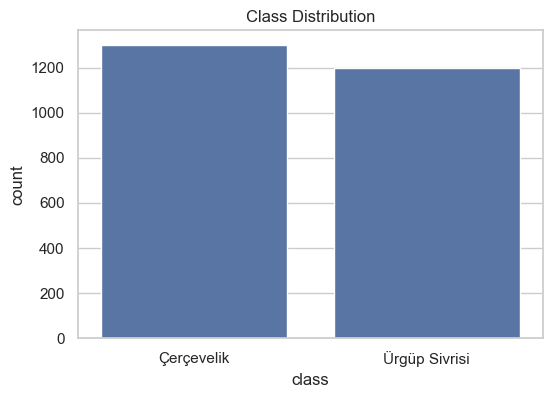

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()

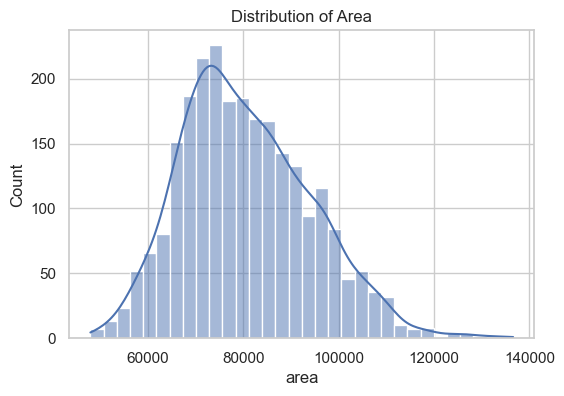

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(df['area'], kde=True)
plt.title("Distribution of Area")
plt.show()

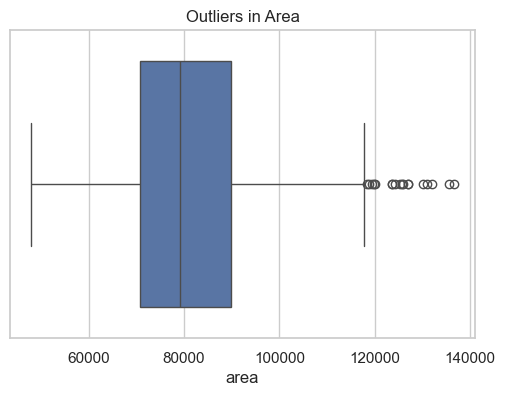

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['area'])
plt.title("Outliers in Area")
plt.show()

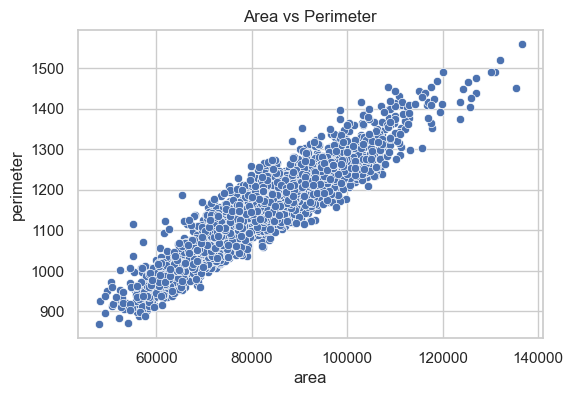

In [24]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='area', y='perimeter', data=df)
plt.title("Area vs Perimeter")
plt.show()

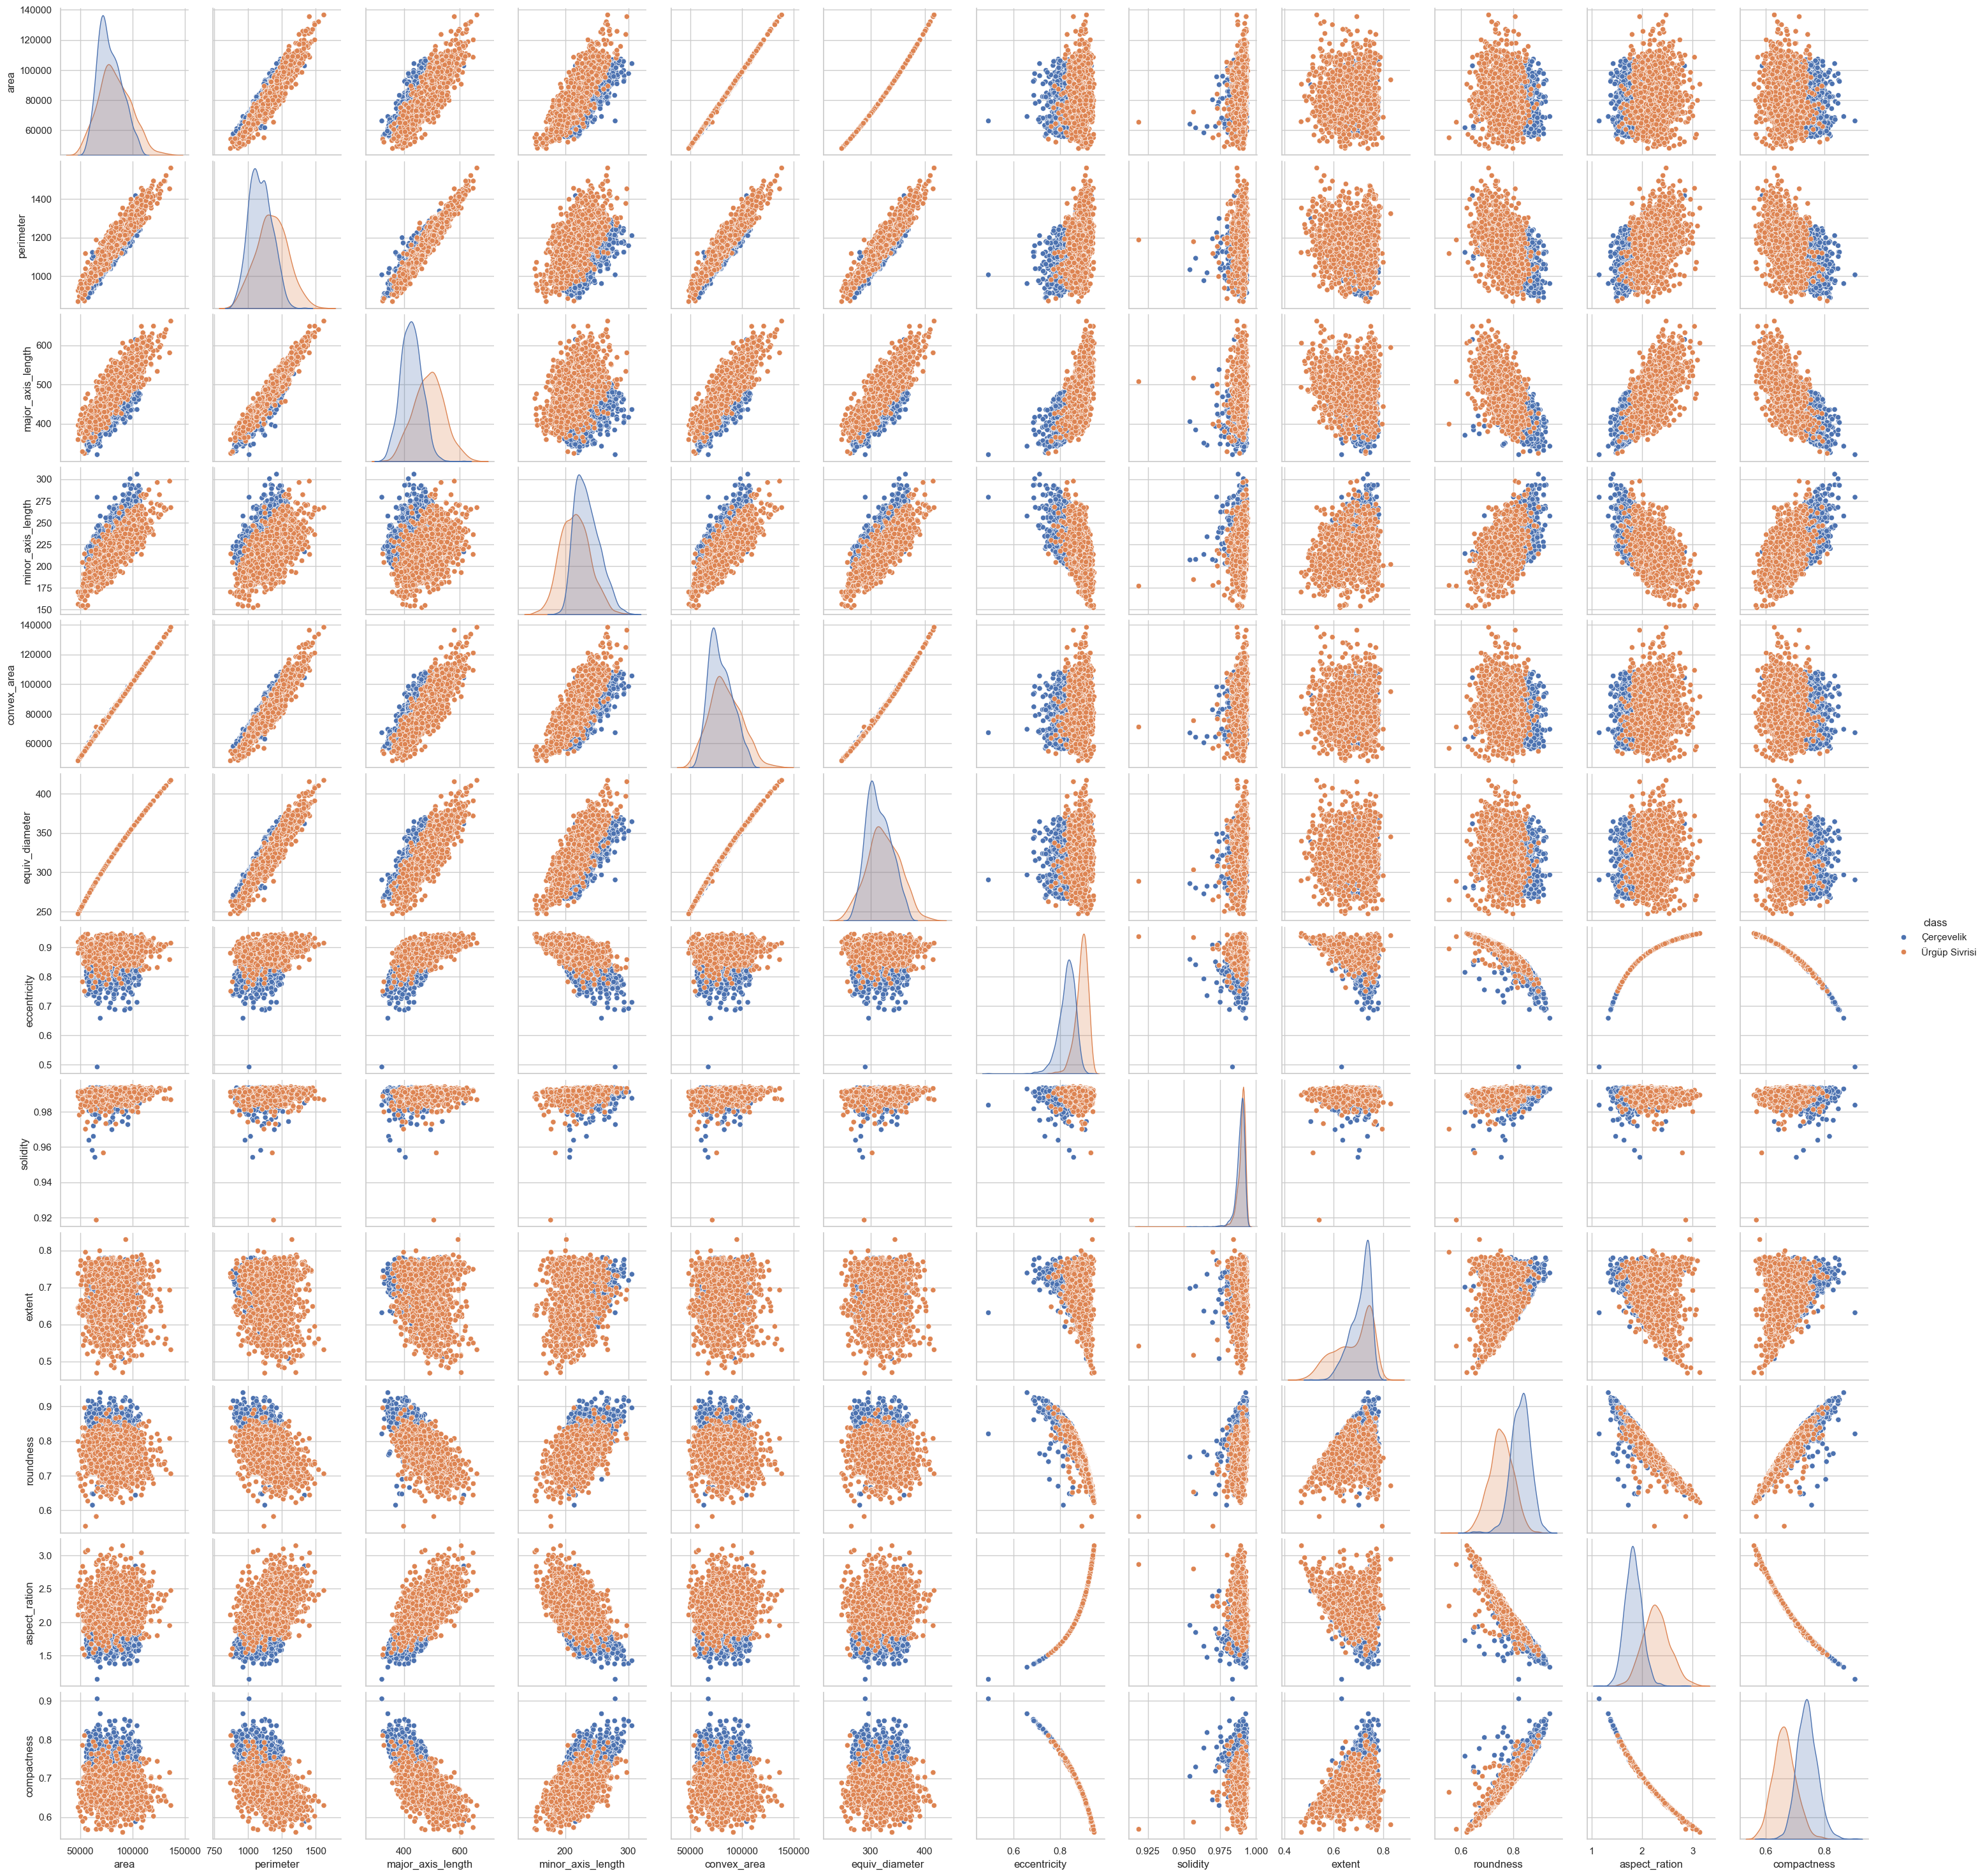

In [25]:
sns.pairplot(df, hue='class')
plt.show()

In [26]:
X = df.drop('class', axis=1)
y = df['class']

X.head(), y.head()

(    area  perimeter  major_axis_length  minor_axis_length  convex_area  \
 0  56276    888.242           326.1485           220.2388        56831   
 1  76631   1068.146           417.1932           234.2289        77280   
 2  71623   1082.987           435.8328           211.0457        72663   
 3  66458    992.051           381.5638           222.5322        67118   
 4  66107    998.146           383.8883           220.4545        67117   
 
    equiv_diameter  eccentricity  solidity  extent  roundness  aspect_ration  \
 0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
 1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
 2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
 3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
 4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   
 
    compactness  
 0       0.8207  
 1       0.7487  
 2       0.6

In [27]:
Q1 = X['area'].quantile(0.25)
Q3 = X['area'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter rows
mask = (X['area'] >= lower_limit) & (X['area'] <= upper_limit)

X = X[mask]
y = y[mask]

X.shape, y.shape

((2482, 12), (2482,))

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_scaled

array([[0.11928404, 0.03370938, 0.01619232, ..., 0.88753247, 0.16645788,
        0.75530369],
       [0.41051909, 0.34066146, 0.29414336, ..., 0.75168831, 0.31688129,
        0.54606219],
       [0.33886568, 0.36598316, 0.35104834, ..., 0.55272727, 0.45918725,
        0.38390003],
       ...,
       [0.57309849, 0.5832284 , 0.56898686, ..., 0.52025974, 0.56827178,
        0.28799768],
       [0.45887941, 0.53653485, 0.55276523, ..., 0.42571429, 0.65270331,
        0.21825051],
       [0.52931666, 0.49726837, 0.43366704, ..., 0.62      , 0.41328857,
        0.43475734]], shape=(2482, 12))

In [29]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()

area  perimeter  major_axis_length  minor_axis_length  convex_area  \
0  0.119284   0.033709           0.016192           0.443011     0.120531   
1  0.410519   0.340661           0.294143           0.534065     0.411699   
2  0.338866   0.365983           0.351048           0.383178     0.345958   
3  0.264966   0.210828           0.185370           0.457938     0.267005   
4  0.259944   0.221228           0.192467           0.444415     0.266990   

   equiv_diameter  eccentricity  solidity    extent  roundness  aspect_ration  \
0        0.147012      0.538377  0.944591  0.766869   0.887532       0.166458   
1        0.465536      0.735526  0.963061  0.683352   0.751688       0.316881   
2        0.391544      0.839474  0.885224  0.752212   0.552727       0.459187   
3        0.312469      0.702193  0.944591  0.751106   0.763636       0.283560   
4        0.306985      0.716228  0.875989  0.573009   0.725195       0.296938   

   compactness  
0     0.755304  
1     0.546062  
2     0.383900  
3     0.585876  
4     0.566405

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape

((1985, 12), (497, 12))

In [31]:
from sklearn.metrics import accuracy_score, classification_report

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

lr_accuracy = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8672032193158954
               precision    recall  f1-score   support

   Çerçevelik       0.86      0.88      0.87       248
Ürgüp Sivrisi       0.87      0.86      0.87       249

     accuracy                           0.87       497
    macro avg       0.87      0.87      0.87       497
 weighted avg       0.87      0.87      0.87       497



In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8249496981891348
               precision    recall  f1-score   support

   Çerçevelik       0.83      0.82      0.82       248
Ürgüp Sivrisi       0.82      0.83      0.83       249

     accuracy                           0.82       497
    macro avg       0.82      0.82      0.82       497
 weighted avg       0.82      0.82      0.82       497



In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8812877263581489
               precision    recall  f1-score   support

   Çerçevelik       0.88      0.88      0.88       248
Ürgüp Sivrisi       0.88      0.88      0.88       249

     accuracy                           0.88       497
    macro avg       0.88      0.88      0.88       497
 weighted avg       0.88      0.88      0.88       497



In [35]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

nb_accuracy = accuracy_score(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8309859154929577
               precision    recall  f1-score   support

   Çerçevelik       0.77      0.95      0.85       248
Ürgüp Sivrisi       0.94      0.71      0.81       249

     accuracy                           0.83       497
    macro avg       0.85      0.83      0.83       497
 weighted avg       0.85      0.83      0.83       497



In [36]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)

print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8893360160965795
               precision    recall  f1-score   support

   Çerçevelik       0.87      0.92      0.89       248
Ürgüp Sivrisi       0.91      0.86      0.89       249

     accuracy                           0.89       497
    macro avg       0.89      0.89      0.89       497
 weighted avg       0.89      0.89      0.89       497



In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred_gb)

print("Gradient Boosting Accuracy:", gb_accuracy)
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8853118712273642
               precision    recall  f1-score   support

   Çerçevelik       0.88      0.90      0.89       248
Ürgüp Sivrisi       0.89      0.88      0.88       249

     accuracy                           0.89       497
    macro avg       0.89      0.89      0.89       497
 weighted avg       0.89      0.89      0.89       497



In [38]:
model_accuracy = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'Naive Bayes',
        'SVM',
        'Gradient Boosting'
    ],
    'Accuracy': [
        lr_accuracy,
        dt_accuracy,
        rf_accuracy,
        nb_accuracy,
        svm_accuracy,
        gb_accuracy
    ]
})

model_accuracy.sort_values(by='Accuracy', ascending=False)

Model  Accuracy
4                  SVM  0.889336
5    Gradient Boosting  0.885312
2        Random Forest  0.881288
0  Logistic Regression  0.867203
3          Naive Bayes  0.830986
1        Decision Tree  0.824950

In [39]:
import pickle

# save gradient boosting model
with open('model.pkl', 'wb') as file:
    pickle.dump(gb, file)

print("Model saved as model.pkl")

Model saved as model.pkl


In [40]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

loaded_model.predict(X_test[:5])

array(['Çerçevelik', 'Ürgüp Sivrisi', 'Ürgüp Sivrisi', 'Ürgüp Sivrisi',
       'Çerçevelik'], dtype=object)